# Default Dataset Klien Kartu Kredit

## Perkenalan:
Resiko kredit mengacu pada kemungkinan kerugian yang bisa jadi dialami pemberi pinjaman ataupun investor sebab kegagalan peminjam buat membayar kembali pinjaman ataupun penuhi kewajiban keuangan yang lain. Ini merupakan resiko kandas bayar utang yang bisa jadi mencuat dari ketidakmampuan peminjam ataupun keengganan buat membayar kembali duit yang dipinjam.

Resiko kredit jadi atensi utama untuk bank, lembaga keuangan, serta investor yang meminjamkan uang ataupun berinvestasi dalam sekuritas, sebab bisa menimbulkan penyusutan nilai investasi mereka ataupun apalagi kehilangan pokok. Buat mengelola resiko kredit, pemberi pinjaman serta investor kerap memakai model evaluasi kredit, melaksanakan uji tuntas pada peminjam, serta menetapkan batasan kredit serta persyaratan agunan.

Model Machine Learning sudah membantu perusahaan- perusahaan ini untuk meningkatkan akurasi analisis resiko kredit mereka, sediakan tata cara ilmiah buat mengenali calon debitur terlebih dulu.

Dalam proyek ini, saya akan membangun model risiko kredit untuk memprediksi risiko default klien untuk sebuah bank di Taiwan.

## Inspirasi:
Pada akhir kasus ini, akan dapat menjawab pertanyaan-pertanyaan di bawah ini.

- Preprocessing Data; persiapan data; dan visualisasi data
- Fitur Teknik dan fitur pilihan
- Pengembangan Model
- Evaluasi Model
- Variabel mana yang merupakan prediktor terkuat dari pembayaran gagal bayar?

## Variables:
Deskripsi variabel dalam himpunan data:


- D: ID masing-masing klien
- LIMIT_BAL: Jumlah kredit yang diberikan dalam dolar NT (termasuk kredit individu dan keluarga / tambahan
- JENIS KELAMIN: Jenis kelamin (1=pria, 2=wanita)
- PENDIDIKAN: (1=sekolah pascasarjana, 2=universitas, 3=SMA, 4=lainnya, 5=tidak diketahui, 6=tidak diketahui)
- PERNIKAHAN: Status perkawinan (1=menikah, 2=lajang, 3=lainnya)
- UMUR: Usia dalam tahun
- PAY_0: Status pelunasan pada bulan September 2005 (-1=bayar jatuh tempo, 1=keterlambatan pembayaran selama satu bulan, 2=keterlambatan pembayaran selama dua bulan, ... 8=penundaan pembayaran selama delapan bulan, 9=keterlambatan pembayaran selama sembilan bulan ke atas)
- PAY_2: Status pelunasan pada Agustus 2005 (skala sama seperti di atas)
- PAY_3: Status pelunasan pada bulan Juli 2005 (skala sama seperti di atas)
- PAY_4: Status pelunasan pada bulan Juni 2005 (skala sama seperti di atas)
- PAY_5: Status pelunasan pada Mei 2005 (skala sama seperti di atas)
- PAY_6: Status pelunasan pada bulan April 2005 (skala sama seperti di atas)
- BILL_AMT1: Jumlah laporan tagihan pada bulan September 2005 (dolar NT)
- BILL_AMT2: Jumlah laporan tagihan pada bulan Agustus 2005 (dolar NT)
- BILL_AMT3: Jumlah laporan tagihan pada bulan Juli 2005 (dolar NT)
- BILL_AMT4: Jumlah laporan tagihan pada bulan Juni 2005 (dolar NT)
- BILL_AMT5: Jumlah laporan tagihan pada Mei 2005 (dolar NT)
- BILL_AMT6: Jumlah laporan tagihan pada bulan April 2005 (dolar NT)
- PAY_AMT1: Jumlah pembayaran sebelumnya pada bulan September 2005 (dolar NT)
- PAY_AMT2: Jumlah pembayaran sebelumnya pada Agustus 2005 (dolar NT)
- PAY_AMT3: Jumlah pembayaran sebelumnya pada bulan Juli 2005 (dolar NT)
- PAY_AMT4: Jumlah pembayaran sebelumnya pada bulan Juni 2005 (dolar NT)
- PAY_AMT5: Jumlah pembayaran sebelumnya pada Mei 2005 (dolar NT)
- PAY_AMT6: Jumlah pembayaran sebelumnya pada bulan April 2005 (dolar NT)
- default.payment.next.month: Pembayaran default (1 = ya, 0 = tidak)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

import warnings
warnings.filterwarnings("ignore")

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_precision_recall_curve

### Read the Data:

In [2]:
df=pd.read_csv('UCI_Credit_Card.csv')
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Data Pre-processing and Data Visualization:

#### 1) Data Pre-processing:

In [3]:
# shape of the dataset
print(df.shape)

(30000, 25)


In [4]:
# Pertama, kami memeriksa apakah ada data yang hilang: 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- Tidak ada data yang hilang untuk database kami. Selanjutnya, kita melihat lebih detail data.
- "default.payment.next.month" adalah fitur dan merupakan variabel target yang kami coba prediksi.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


- Himpunan data berisi total 30.000 klien;

- Saldo kartu kredit tipikal adalah 167.484 dolar NT. Jumlah minimum kartu kredit yang dapat digunakan adalah seratus ribu dolar NT, dan jumlah maksimum yang dapat digunakan adalah satu juta dolar NT. Dalam sampel kami, usia rata-rata pelanggan yang memiliki kartu kredit adalah 35,48 tahun. Usia termuda di mana seseorang dapat mengajukan permohonan kartu kredit adalah 21, dan usia tertua adalah 79.

- 22,1% dari kartu kredit mendapatkan yang akan default satu bulan dari sekarang

##### Drop ID and rename "default.payment.next.month"

In [6]:
df.drop(["ID"], axis=1, inplace= True) 
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

##### Drop repeated Categories:
Beberapa data kategoris memiliki kategori berulang. Pertama, mari kita periksa fitur mana yang mengandung katagori berulang dan kemudian jatuhkan yang berulang:

In [7]:
ca=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in ca:
    print (i,df[i].unique())

SEX [2 1]
EDUCATION [2 1 3 5 4 6 0]
MARRIAGE [1 2 3 0]
PAY_0 [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2 [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3 [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4 [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5 [-2  0 -1  2  3  5  4  7  8  6]
PAY_6 [-2  2  0 -1  3  6  4  7  8  5]


##### EDUCATION FEATURE(FITUR PENDIDIKAN):
PENDIDIKAN: (1 = sekolah pascasarjana, 2 = universitas, 3 = sekolah menengah, 4 = lainnya, 5 = tidak diketahui, 6 = tidak diketahui)
kategori 4,5,6 dan 0 dapat dikelompokkan ke dalam kelas 4

In [8]:
df['EDUCATION'].replace({0:4,5:4,6:4}, inplace=True)
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

##### FITUR PERNIKAHAN:
Status perkawinan: 1 berarti menikah, 2 berarti lajang, dan 3 berarti lainnya. 

Kami akan menempatkan kategori 1 dan 3 bersama-sama.

In [9]:
df['MARRIAGE'].replace({0:3}, inplace=True)
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

##### MENEMUKAN DAN MENGGANTI PENCILAN(Outliers)


<AxesSubplot:xlabel='LIMIT_BAL'>

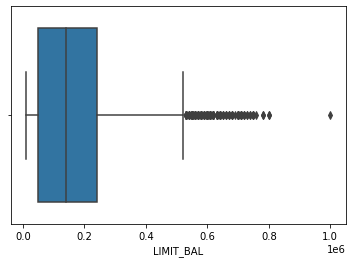

In [10]:
sns.boxplot(df.LIMIT_BAL)


<b>Observation:</b>

Terlihat jelas pendapatan tahunan pelanggan dan Pembayran Default terdapat outlier, outlier tersebut  di hapus supaya hasil prediksi berjalan dengan baik

<AxesSubplot:xlabel='LIMIT_BAL'>

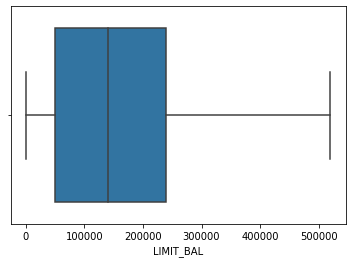

In [11]:
# Replacement of Outliers¶
q1=df.LIMIT_BAL.quantile(0.25)
q3=df.LIMIT_BAL.quantile(0.75)
IQR=q3-q1
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR
df['LIMIT_BAL'] = np.where(df['LIMIT_BAL'] > upper_limit, 7, df['LIMIT_BAL'])
sns.boxplot(x=df.LIMIT_BAL,showfliers = False)

Outlier sudah dihilangkan mari lakukan tahap selanjutnya

#### 2) Visualisasi Data:

##### Variabel Target:

Kami akan memvisualisasikan kolom target "default" untuk mengetahui seberapa implance (keseimbangan) data

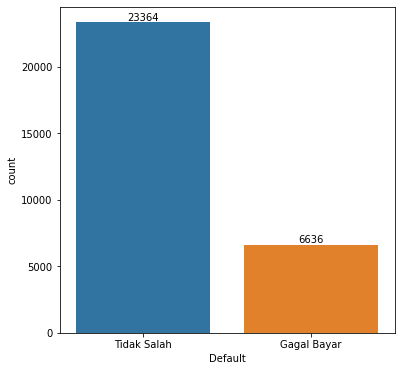

In [12]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x= df['Default'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Tidak Salah", "Gagal Bayar"])
plt.show()

Data tersebut cukup tidak seimbang dimana sekitar 22% klien akan gagal bayar bulan depan.

##### Variabel SEX:

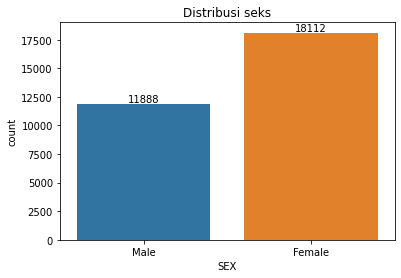

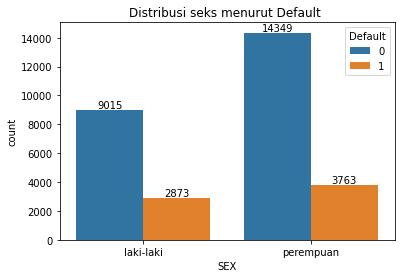

In [13]:
ax=sns.countplot(x= df['SEX'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["Male", "Female"])
plt.title("Distribusi seks")
plt.show()

ax=sns.countplot(data=df, x="SEX", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1], labels=["laki-laki", "perempuan"])
plt.title("Distribusi seks menurut Default ")
plt.show()

- Lebih banyak klien wanita memiliki kartu kredit daripada klien pria.
- 24% klien pria melakukan penipuan kartu kredit sedangkan rasio untuk wanita sekitar 20%

##### VARIABEL PENDIDIKAN:

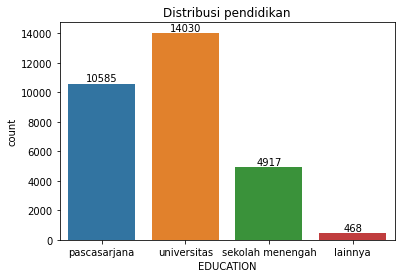

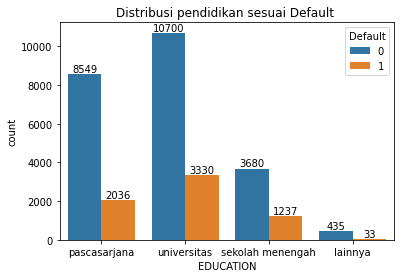

In [14]:
ax=sns.countplot(x= df['EDUCATION'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["pascasarjana", "universitas", 'sekolah menengah','lainnya'])
plt.title("Distribusi pendidikan")
plt.show()

ax=sns.countplot(data=df, x="EDUCATION", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2,3], labels=["pascasarjana", "universitas", 'sekolah menengah','lainnya'])
plt.title("Distribusi pendidikan sesuai Default ")
plt.show()

- Mahasiswa merupakan kelompok dengan jumlah nasabah terbanyak yang menggunakan kartu kredit (47%)
- Siswa SMA adalah kelompok yang memiliki kasus penipuan tertinggi (25%), diikuti oleh mahasiswa (23%)

##### VARIABEL STATUS PERNIKAHAN:

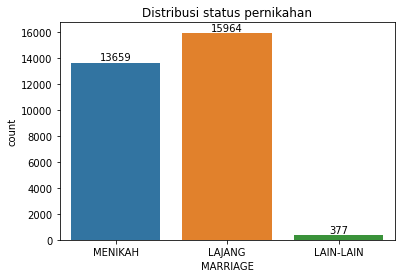

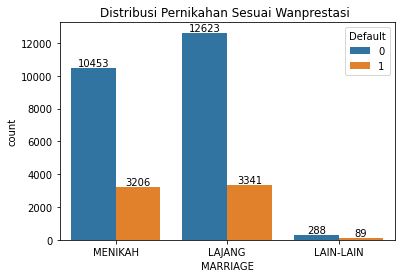

In [15]:
ax=sns.countplot(x= df['MARRIAGE'])
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MENIKAH", "LAJANG",'LAIN-LAIN'])
plt.title("Distribusi status pernikahan")
plt.show()

ax=sns.countplot(data=df, x="MARRIAGE", hue="Default")
for label in ax.containers:
    ax.bar_label(label)
plt.xticks([0,1,2], labels=["MENIKAH", "LAJANG",'LAIN-LAIN'])
plt.title("Distribusi Pernikahan Sesuai Wanprestasi ")
plt.show()

- Single adalah kelompok dengan jumlah nasabah terbanyak yang menggunakan kartu kredit (53%)
- Orang yang sudah menikah adalah kelompok yang memiliki kasus penipuan tertinggi (30%)

##### VARIABEL USIA:

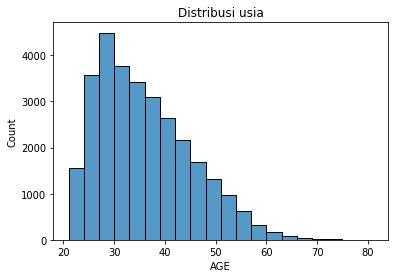

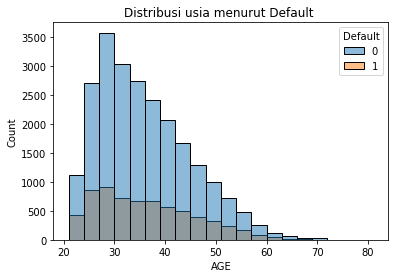

In [16]:
sns.histplot(data=df, x="AGE",binwidth=3)
plt.title("Distribusi usia")
plt.show()

sns.histplot(data=df, x="AGE", hue="Default", binwidth=3)
plt.title("Distribusi usia menurut Default ")
plt.show()

- Histogram condong ke kanan yang berarti pelanggan yang lebih tua cenderung tidak menggunakan kartu kredit
- Klien utama berusia 30-an
- Pelanggan berusia 30-an juga paling rentan terhadap penipuan kredit

##### LIMIT_BAL VARIABEL:

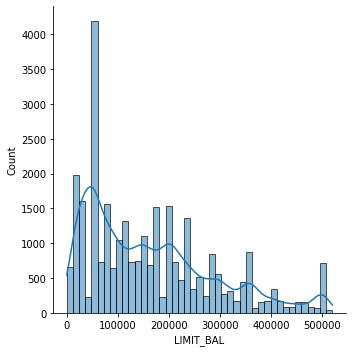

In [17]:
sns.displot(df.LIMIT_BAL, kde=True)

##### Jumlah tagihan dan Jumlah pembayaran sebelumnya

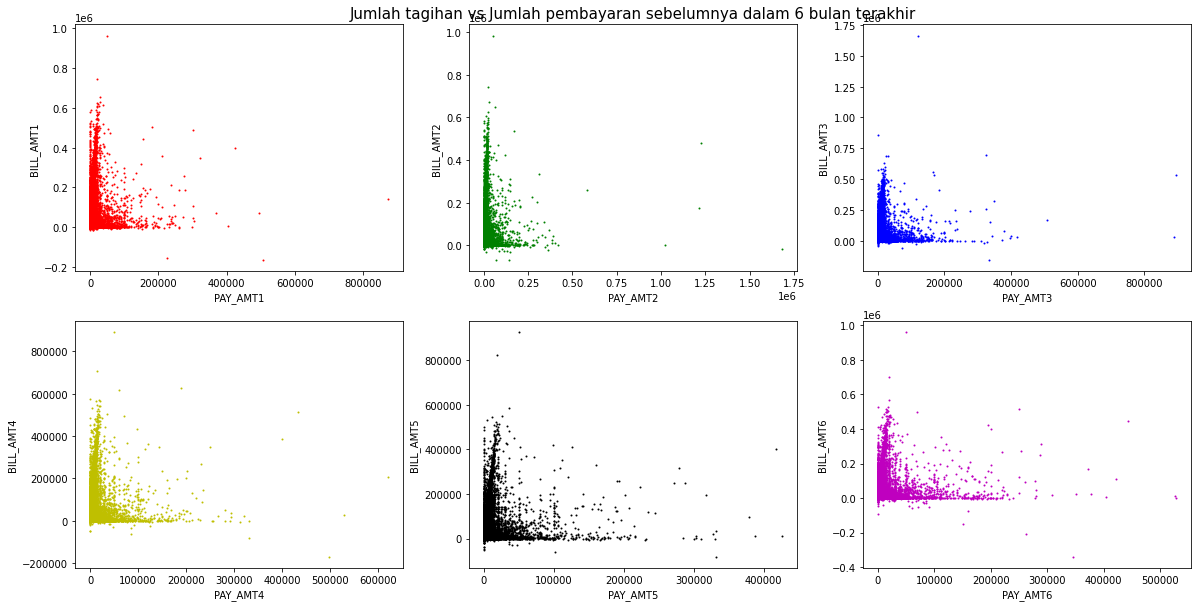

In [18]:
plt.subplots(figsize=(20,10))
plt.subplot(231)
plt.scatter(x=df.PAY_AMT1, y=df.BILL_AMT1, c='r', s=1)
plt.xlabel('PAY_AMT1')
plt.ylabel('BILL_AMT1')

plt.subplot(232)
plt.scatter(x=df.PAY_AMT2, y=df.BILL_AMT2, c='g', s=1)
plt.xlabel('PAY_AMT2')
plt.ylabel('BILL_AMT2')
plt.title('Jumlah tagihan vs Jumlah pembayaran sebelumnya dalam 6 bulan terakhir', fontsize=15)

plt.subplot(233)
plt.scatter(x=df.PAY_AMT3, y=df.BILL_AMT3, c='b', s=1)
plt.xlabel('PAY_AMT3')
plt.ylabel('BILL_AMT3')

plt.subplot(234)
plt.scatter(x=df.PAY_AMT4, y=df.BILL_AMT4, c='y', s=1)
plt.xlabel('PAY_AMT4')
plt.ylabel('BILL_AMT4')

plt.subplot(235)
plt.scatter(x=df.PAY_AMT5, y=df.BILL_AMT5, c='black', s=1)
plt.xlabel('PAY_AMT5')
plt.ylabel('BILL_AMT5')

plt.subplot(236)
plt.scatter(x=df.PAY_AMT6, y=df.BILL_AMT6, c='m', s=1)
plt.xlabel('PAY_AMT6')
plt.ylabel('BILL_AMT6')


plt.show()

##### Analisis Korelasi:

<AxesSubplot:>

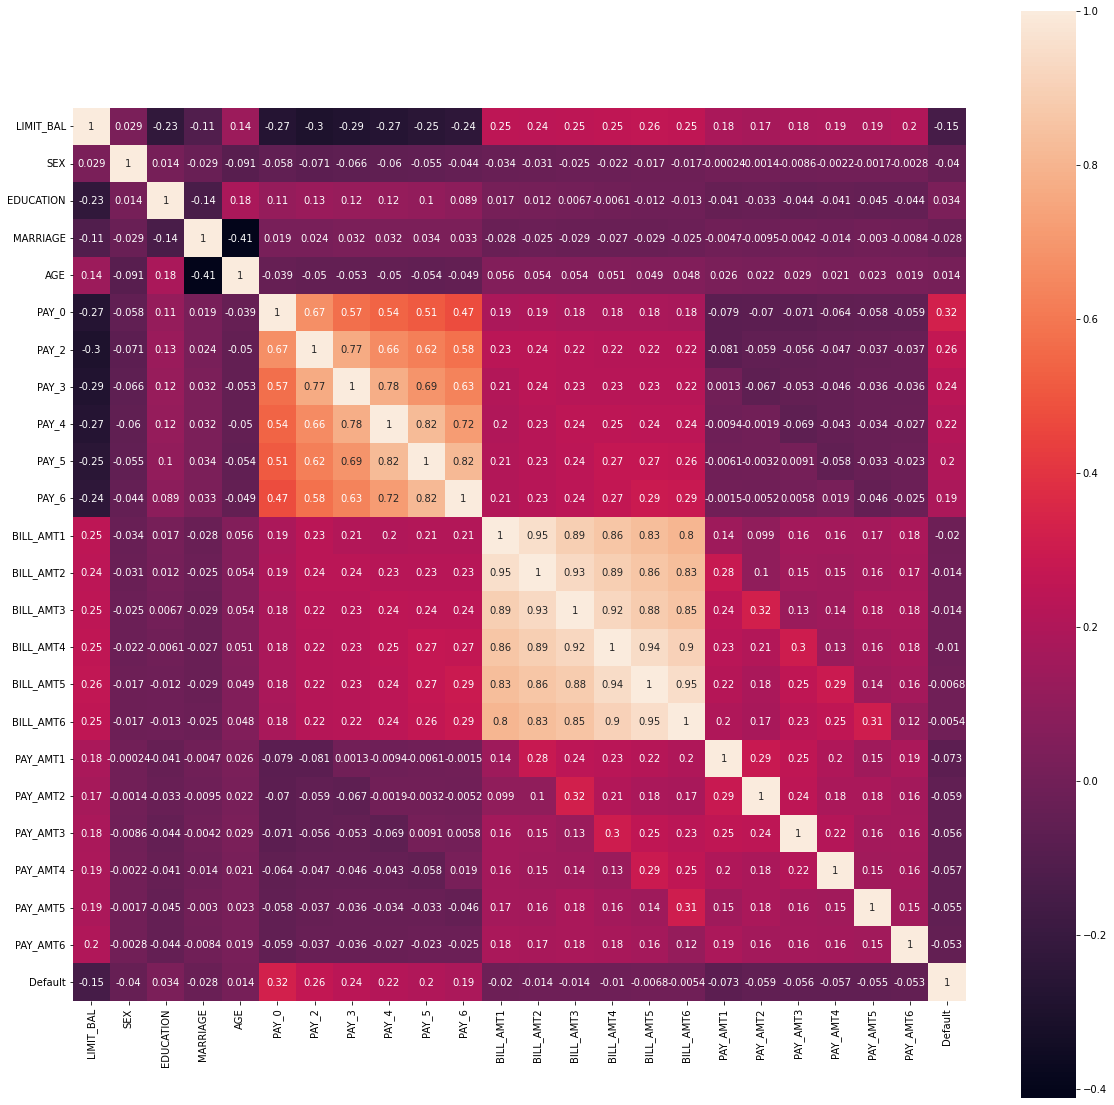

In [19]:
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(),annot = True,square = True)

Korelasinya tinggi antara PAY_0,2,3,4,5,6 dan BILL_AMT1,2,3,4,5,6.

In [20]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### PEMODELAN:

In [21]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

Create target feaure and independent feature:

In [22]:
X = df.drop(['Default'], axis=1)

y = df['Default']
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [23]:
# Feature Engineering: 

scaler= StandardScaler()
X= scaler.fit_transform(X)
X


array([[-1.14523823,  0.81016074,  0.21186989, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.35018251,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.58869923,  0.81016074,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.06573266, -1.23432296,  0.21186989, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.6682048 , -1.23432296,  1.55508562, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90672151, -1.23432296,  0.21186989, ..., -0.24422965,
        -0.24868274, -0.23713013]])

melakukan Feature Engineering untuk eningkatkan kualitas fitur, dan membantu model machine learning untuk belajar dan melakukan prediksi dengan lebih baik.

### Menyeimbangkan data(Balancing the data)
Algoritma SMOTE bekerja seperti ini:

Anda memilih sampel acak dari kelompok minoritas. Anda akan menentukan k tetangga terdekat untuk pengamatan dalam sampel ini. Kemudian, dengan menggunakan salah satu tetangga tersebut, Anda akan menentukan vektor antara titik data saat ini dan tetangga yang dipilih. Vektor dikalikan dengan angka acak antara 0 dan 1. Anda menambahkan ini ke titik data saat ini untuk mendapatkan titik data sintetis. 

Operasi ini pada dasarnya sama dengan memindahkan titik data sedikit ke arah tetangganya. Ini memastikan bahwa titik data sintetis Anda bukan replika yang tepat dari titik data yang ada, sementara juga memastikan bahwa itu tidak terlalu berbeda dari pengamatan yang diketahui di kelas minoritas Anda.


In [24]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)
# sUmmarize distribusi kelas

print("Sebelum oversampling: ",Counter(y_train))
SMOTE= SMOTE()


X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("Setelah oversampling: ",Counter(y_train))

Sebelum oversampling:  Counter({0: 18677, 1: 5323})
Setelah oversampling:  Counter({0: 18677, 1: 18677})


### Building Model:

- a. Logistic Regression
- b. Random Forest Classifier
- c. Decision Tree
- d. XGBoost Classifier

##### a) Logistic Regression

Akurasi model logit: 0.6848333333333333
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.37      0.65      0.48      1313

    accuracy                           0.68      6000
   macro avg       0.63      0.67      0.63      6000
weighted avg       0.77      0.68      0.71      6000

confusion matrix logistic regression


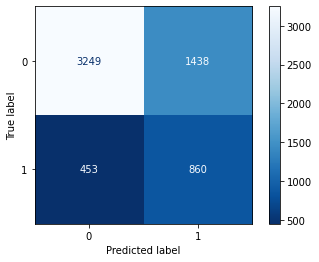

In [25]:
logit= LogisticRegression()
logit.fit(X_train, y_train)

pred_logit= logit.predict(X_test)



print("Akurasi model logit:", accuracy_score(y_test, pred_logit))

print(classification_report(y_test, pred_logit))

print('confusion matrix logistic regression')
plot_confusion_matrix(logit, X_test, y_test, cmap="Blues_r")

##### b) Decision Tree Classifier:

Akurasi Decision Tree : 0.6851666666666667
              precision    recall  f1-score   support

           0       0.88      0.69      0.77      4687
           1       0.38      0.67      0.48      1313

    accuracy                           0.69      6000
   macro avg       0.63      0.68      0.63      6000
weighted avg       0.77      0.69      0.71      6000

confusion matrix decision tree


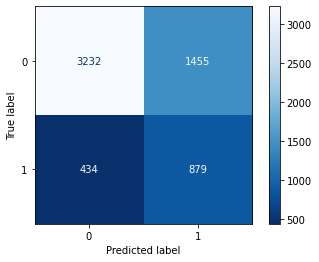

In [26]:

Tree = DecisionTreeClassifier(criterion= 'gini', max_depth= 7, 
                                     max_features= 9, min_samples_leaf= 2, 
                                     random_state=0)
Tree.fit(X_train, y_train)
pred_tree = Tree.predict(X_test)
print('Akurasi Decision Tree :', accuracy_score(y_test,pred_tree))

print(classification_report(y_test, pred_tree))

print('confusion matrix decision tree')
plot_confusion_matrix(Tree, X_test, y_test, cmap="Blues_r")

##### c) Random Forest:

Akurasi Random Forest: 0.7928333333333333
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4687
           1       0.53      0.46      0.49      1313

    accuracy                           0.79      6000
   macro avg       0.69      0.67      0.68      6000
weighted avg       0.78      0.79      0.79      6000



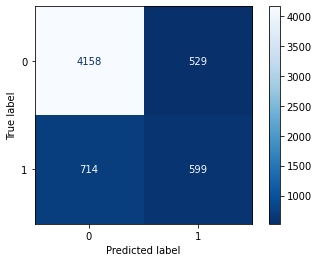

In [27]:

rf= RandomForestClassifier()

rf.fit(X_train,y_train)

pred_rf= rf.predict(X_test)

print("Akurasi Random Forest:", accuracy_score(y_test, pred_rf))

print(classification_report(y_test,pred_rf ))

plot_confusion_matrix(rf, X_test, y_test, cmap="Blues_r")

##### d) XGBoost:

XGBoost Accuracy: 0.808
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4687
           1       0.59      0.39      0.47      1313

    accuracy                           0.81      6000
   macro avg       0.72      0.66      0.68      6000
weighted avg       0.79      0.81      0.79      6000



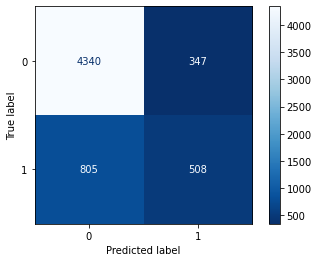

In [28]:

xgboost= xgb.XGBClassifier()


xgboost.fit(X_train,y_train)

xgboost_pred= xgboost.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgboost_pred))
print(classification_report(y_test,xgboost_pred ))
plot_confusion_matrix(xgboost, X_test, y_test, cmap="Blues_r")

#### Hyper parameter turning:

In [29]:

# Optimasi Parameter Hiper

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [30]:
random_search=RandomizedSearchCV(xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)


random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                         

In [31]:
# Penapsir terbaik:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [32]:
# param terbaik
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.3,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [33]:
classifier=XGBClassifier(objective='binary:logistic',
                                  min_child_weight=3,
                                 max_depth=10,
                                 learning_rate=0.25,
                                 gamma=0.1,
                                  colsample_bynode=1,
                                  colsample_bytree=0.4,
                                  use_label_encoder=False)

# Fitting the model
classifier.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=1, colsample_bytree=0.4,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.25, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [34]:
# Model prediksi
hyper_pred= classifier.predict(X_test)

print("Keakuratan model adalah:", accuracy_score(y_test, hyper_pred))

Keakuratan model adalah: 0.807


### Compare Model Performance:

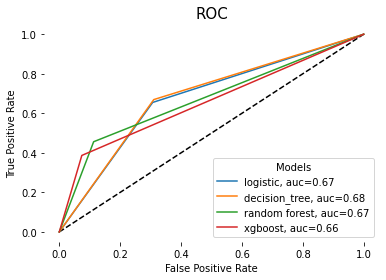

In [35]:

# logistic model 
pred_logit= logit.predict(X_test)
fpr1, tpr1, _ = metrics.roc_curve(y_test,  pred_logit)
auc1 = metrics.roc_auc_score(y_test, pred_logit)

# decision tree model:
pred_tree = Tree.predict(X_test)
fpr2, tpr2, _ = metrics.roc_curve(y_test,  pred_tree)
auc2 = metrics.roc_auc_score(y_test, pred_tree)

# random forest model: 
pred_rf= rf.predict(X_test)
fpr3, tpr3, _ = metrics.roc_curve(y_test,  pred_rf)
auc3 = metrics.roc_auc_score(y_test, pred_rf)

# XGboost:
xgboost_pred= xgboost.predict(X_test)
fpr4, tpr4, _ = metrics.roc_curve(y_test,  xgboost_pred)
auc4 = metrics.roc_auc_score(y_test, xgboost_pred)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr1,tpr1,label="logistic, auc="+str(round(auc1,2)))
plt.plot(fpr2,tpr2,label="decision_tree, auc="+str(round(auc2,2)))
plt.plot(fpr3,tpr3,label="random forest, auc="+str(round(auc3,2)))
plt.plot(fpr4,tpr4,label="xgboost, auc="+str(round(auc4,2)))

plt.legend(loc=4, title='Models', facecolor='white')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC', size=15)
plt.box(False)
plt.show()

In [36]:
data = {'logistic':68.08,
                'decision_tree':72.83,
               'randome_forest': 79.35,
                'xgboost': 81.35,
               'xgboost_hyper':80.58}
courses = list(data.keys())
values = list(data.values())

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

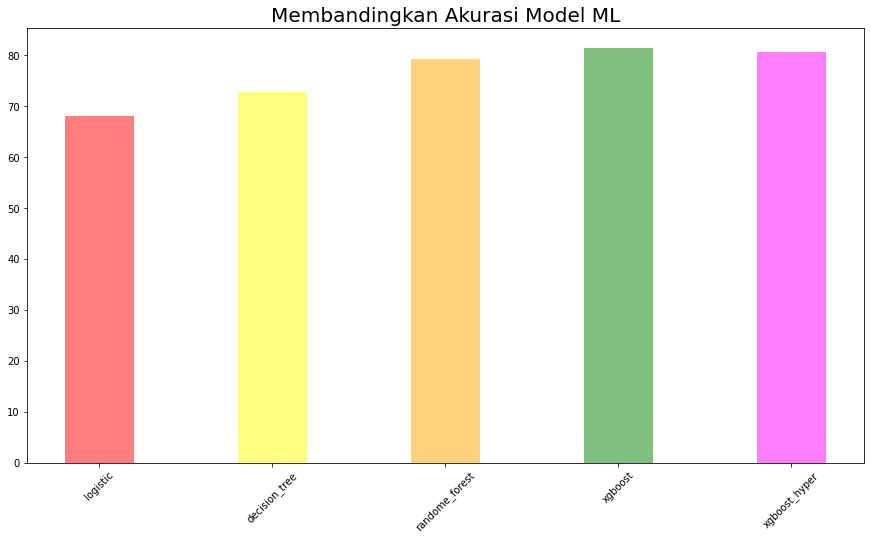

In [37]:
plt.figure(figsize=(15,8))
plt.title('Membandingkan Akurasi Model ML',fontsize=20)
colors=['red','yellow','orange','green','magenta'
    ]
plt.bar(courses, values, color =colors,alpha=0.5,width = 0.4)
plt.xticks(rotation = 45)

# Kesimpulan:

- Dalam proyek ini, pertama-tama kami memeriksa ketidakseimbangan data, memvisualisasikan feaure dan menyelidiki hubungan antara fitur yang berbeda untuk menemukan prediktor terkuat dari pembayaran default

- Kami kemudian menjalankan model 5 ML yang berbeda untuk menemukan model terbaik untuk mendeteksi default kredit:
- Model logistik dengan akurasi 68,08%,

- Decision_tree model dengan akurasi 72,83%,
- Randome_forest model dengan akurasi 79,35%,
- Model XGboost dengan akurasi 81,35%,
- Model hyperparameter XGboost dengan akurasi 80,58%

Di antara semua model ML yang kami gunakan untuk memprediksi kartu kredit default, XGboost adalah model terbaik dengan skor akurasi tertinggi dan Variabel yang merupakan prediktor terkuat dari pembayaran gagal bayar adalah default.payment.next.month 
